<a href="https://colab.research.google.com/github/sjh04/Pytorch-Tutorail/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [74]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flowers) -->
  #Hidden Layer1 (number of neurons) -->
  #H2 (n) -->
  #Output
  def __init__(self, in_features=4, h1=8, h2=9, out_feature=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_feature)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [75]:
# Pick a manual seed for randomization
torch.manual_seed(32)
# Create  an instance of model
model = Model()

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [78]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [79]:
# Change last column into num
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [80]:
# Train Test Split
X = my_df.drop('species', axis=1)
y = my_df['species']

In [81]:
X = X.values
y = y.values

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [84]:
# Create X feature to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [85]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [86]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [87]:
# Train Model
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get prediction
  y_pred = model.forward(X_train)

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train)

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.169895887374878
Epoch: 10 and loss: 0.9578844308853149
Epoch: 20 and loss: 0.7988812923431396
Epoch: 30 and loss: 0.634953498840332
Epoch: 40 and loss: 0.44043001532554626
Epoch: 50 and loss: 0.291716992855072
Epoch: 60 and loss: 0.17829042673110962
Epoch: 70 and loss: 0.11587586998939514
Epoch: 80 and loss: 0.08928147703409195
Epoch: 90 and loss: 0.07743765413761139


Text(0.5, 0, 'epochs')

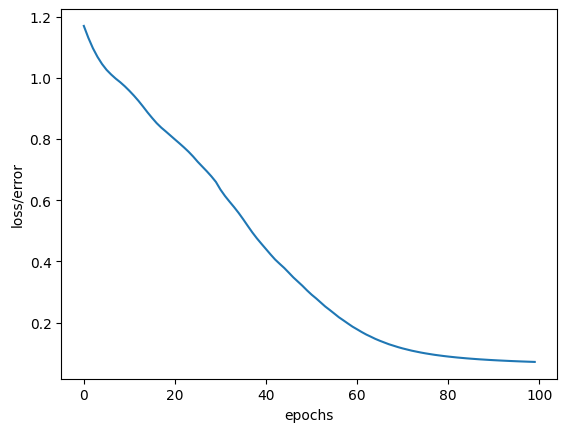

In [88]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epochs")

In [89]:
# Evaluate Model on Test Data Set
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [90]:
loss

tensor(0.0539)

In [91]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    #Correct ot not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} correct')

1.) tensor([-3.3580,  3.9452,  0.3616]) 	 1 	 1
2.) tensor([  7.5862,   1.1113, -11.3861]) 	 0 	 0
3.) tensor([  6.6288,   1.5092, -10.4603]) 	 0 	 0
4.) tensor([-3.3304,  4.2647,  0.0569]) 	 1 	 1
5.) tensor([-7.3705,  2.8135,  5.1481]) 	 2 	 2
6.) tensor([-7.3749,  3.9061,  4.2781]) 	 2 	 2
7.) tensor([  6.2304,   1.6527, -10.0543]) 	 0 	 0
8.) tensor([  6.8783,   1.4056, -10.7016]) 	 0 	 0
9.) tensor([-2.6728,  4.3138, -0.6444]) 	 1 	 1
10.) tensor([  7.2201,   1.3890, -11.1494]) 	 0 	 0
11.) tensor([-3.8269,  4.4110,  0.5165]) 	 1 	 1
12.) tensor([-8.6886,  1.9990,  6.9012]) 	 2 	 2
13.) tensor([-2.0605,  3.8275, -0.7672]) 	 1 	 1
14.) tensor([-1.0676,  4.3809, -2.2975]) 	 1 	 1
15.) tensor([-7.5000,  2.6230,  5.3318]) 	 2 	 2
16.) tensor([-8.6214,  1.5491,  7.1280]) 	 2 	 2
17.) tensor([-3.7724,  3.6503,  0.9422]) 	 1 	 1
18.) tensor([-6.7624,  2.7791,  4.5289]) 	 2 	 2
19.) tensor([-1.6978,  4.2047, -1.4772]) 	 1 	 1
20.) tensor([  7.8104,   1.3824, -11.9435]) 	 0 	 0
21.) tensor

In [92]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [93]:
with torch.no_grad():
  print(model(new_iris))

tensor([  6.9155,   1.2532, -10.6096])


In [94]:
# Save our NN Model
torch.save(model.state_dict(), 'my_first_try.pt')

In [95]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_first_try.pt'))

<ipython-input-95-56741cce057c>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_first_try.pt'))


<All keys matched successfully>

In [96]:
# Make sure load correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)